## This notebook aims to Analys,clean and transform applications_data.

In [1]:
#importing libraries 
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###  Importing the dataset

In [3]:
# importing application_data.csv

application_data = pd.read_csv("/Users/anurag/Desktop/Anurag_Koushal_Appinventiv_Submission/Assignment_2/Anurag_Koushal_Appinventiv/dataset/application_data.csv")

In [ ]:
#checking shape of raw dataset

application_data.shape

(307511, 122)

In [ ]:
#Checking columns and their data types
application_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

**NOTE:**

> **There are 122 columns having various data types like object, int, float and 305711 rows.**

In [ ]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking the numeric variables of the dataframes
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**INSIGHT**

* **columns having negative, postive values for days are present. fixing is required**
* **columns with very hight values(Amount(Price). standardising them is suggested**

## 2. Data Cleaning & Tansformations

### Handling Null Values

In [ ]:
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

null_values(application_data)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
                               ...  
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
HOUR_APPR_PROCESS_START         0.00
SK_ID_CURR                      0.00
Length: 122, dtype: float64

### Null values more than 50 %

In [ ]:
#creating a variable missing_50 for storing null columns having missing values more than 50%

missing_50 = null_values(application_data)[null_values(application_data)>50]

In [ ]:
#revieving missing_50
print("Number of columns having missing values more than 50% :",len(null_col_50))

Number of columns having missing values more than 50% : 41


**INSIGHT**
* **There are 41 columns having null values more than 50% which are related to different area sizes on apartment owned/rented by the loan applicant**

In [ ]:
missing_50.index  #  drop all these columns

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE'],
      dtype='object')

In [ ]:
# missing_50 column dropping all

application_data.drop(columns = missing_50.index, inplace = True)

In [ ]:
application_data.shape  

(307511, 81)

* **After after dropping 41 columns we are left with 81 columns**

### null values more than 15%

In [ ]:

missing_15 = null_values(application_data)[null_values(application_data)>15]

In [ ]:
missing_15 

FLOORSMAX_AVG                   49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64

* **only 'OCCUPATION_TYPE', 'EXT_SOURCE_3 looks important to TARGET column. (decision from column description)**
**Thus dropping all other columns except 'OCCUPATION_TYPE','EXT_SOURCE_3**

In [ ]:
#removing 'OCCUPATION_TYPE', 'EXT_SOURCE_3' from "null_col_15" so that we can drop all other at once.

missing_15.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"], inplace = True)

In [ ]:
#thus removing columns having missing values more than 15% and which are not reletable to TARGET column.

application_data.drop(missing_15.index,axis=1, inplace = True)

In [ ]:
application_data.shape  

(307511, 73)

* **After after dropping 8 columns we are left with 73 columns**
* **There are 2 more Columns with missing values more than 15%**

In [ ]:
null_values(application_data).head(10)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

### Removing Unneccsary Columns

### EXT_SOURCE_3 , EXT_SOURCE_2 are having normalized values.  

In [ ]:
Unneccsary = ["EXT_SOURCE_3","EXT_SOURCE_2"]  

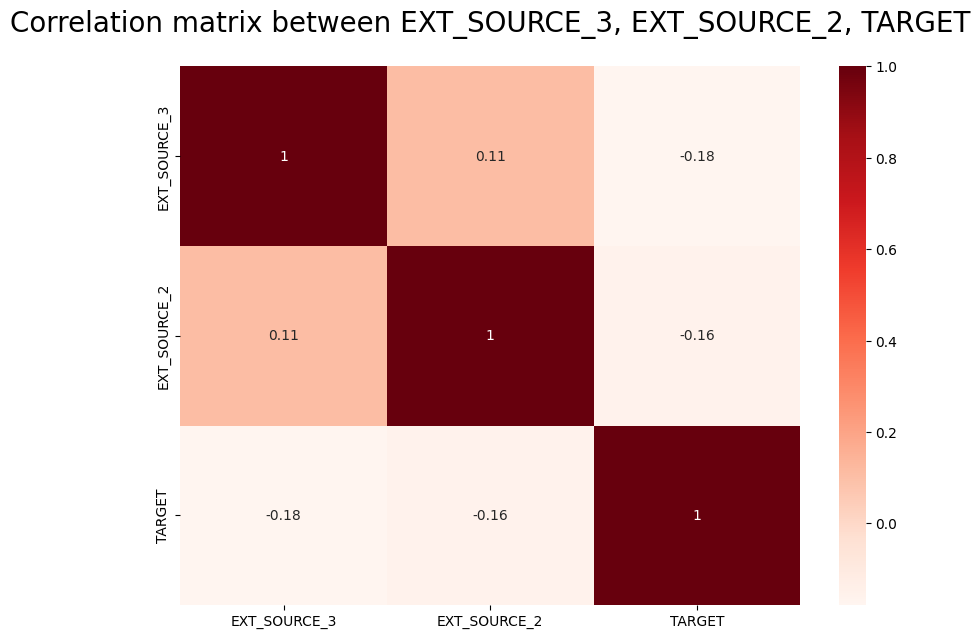

In [ ]:
plt.figure(figsize= [10,7])

sns.heatmap(application_data[Unneccsary+["TARGET"]].corr(), 
            cmap="Reds",
            annot=True)

plt.title("Correlation matrix between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", 
          fontdict={"fontsize":20}, 
          pad=25)
plt.show()

* **No clear linear correlation can be seen. Deciding to drop them.**

In [ ]:
#dropping Unneccesary c

application_data.drop(Unneccsary, axis=1, inplace= True)

In [ ]:
application_data.shape  

(307511, 71)

In [ ]:
null_values(application_data).head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

### Considering columns with FLAGS and their relation with TARGET columns 


**For this we will create a dataframe containig all FLAG columns and then plot bar graphs for each column with respect to TARGET column for which "0" will represent as Repayer and "1" will represent as Defaulter**

In [ ]:
# adding all flags coloumns in variable "flag_columns"

flag_columns = [col for col in application_data.columns if "FLAG" in col]

flag_columns  # Viewing all FLAG columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
# creating flag_df dataframe having all FLAG columns and TARGET column

flag_df = application_data[flag_columns+["TARGET"]]

In [ ]:
# mapping "0" to repayer and "1" to defaulter for TARGET column

flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 
                                               0:"Repayer"})

/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Mapping  "1" as Y being TRUE and "0" as N being False

for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})

/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer


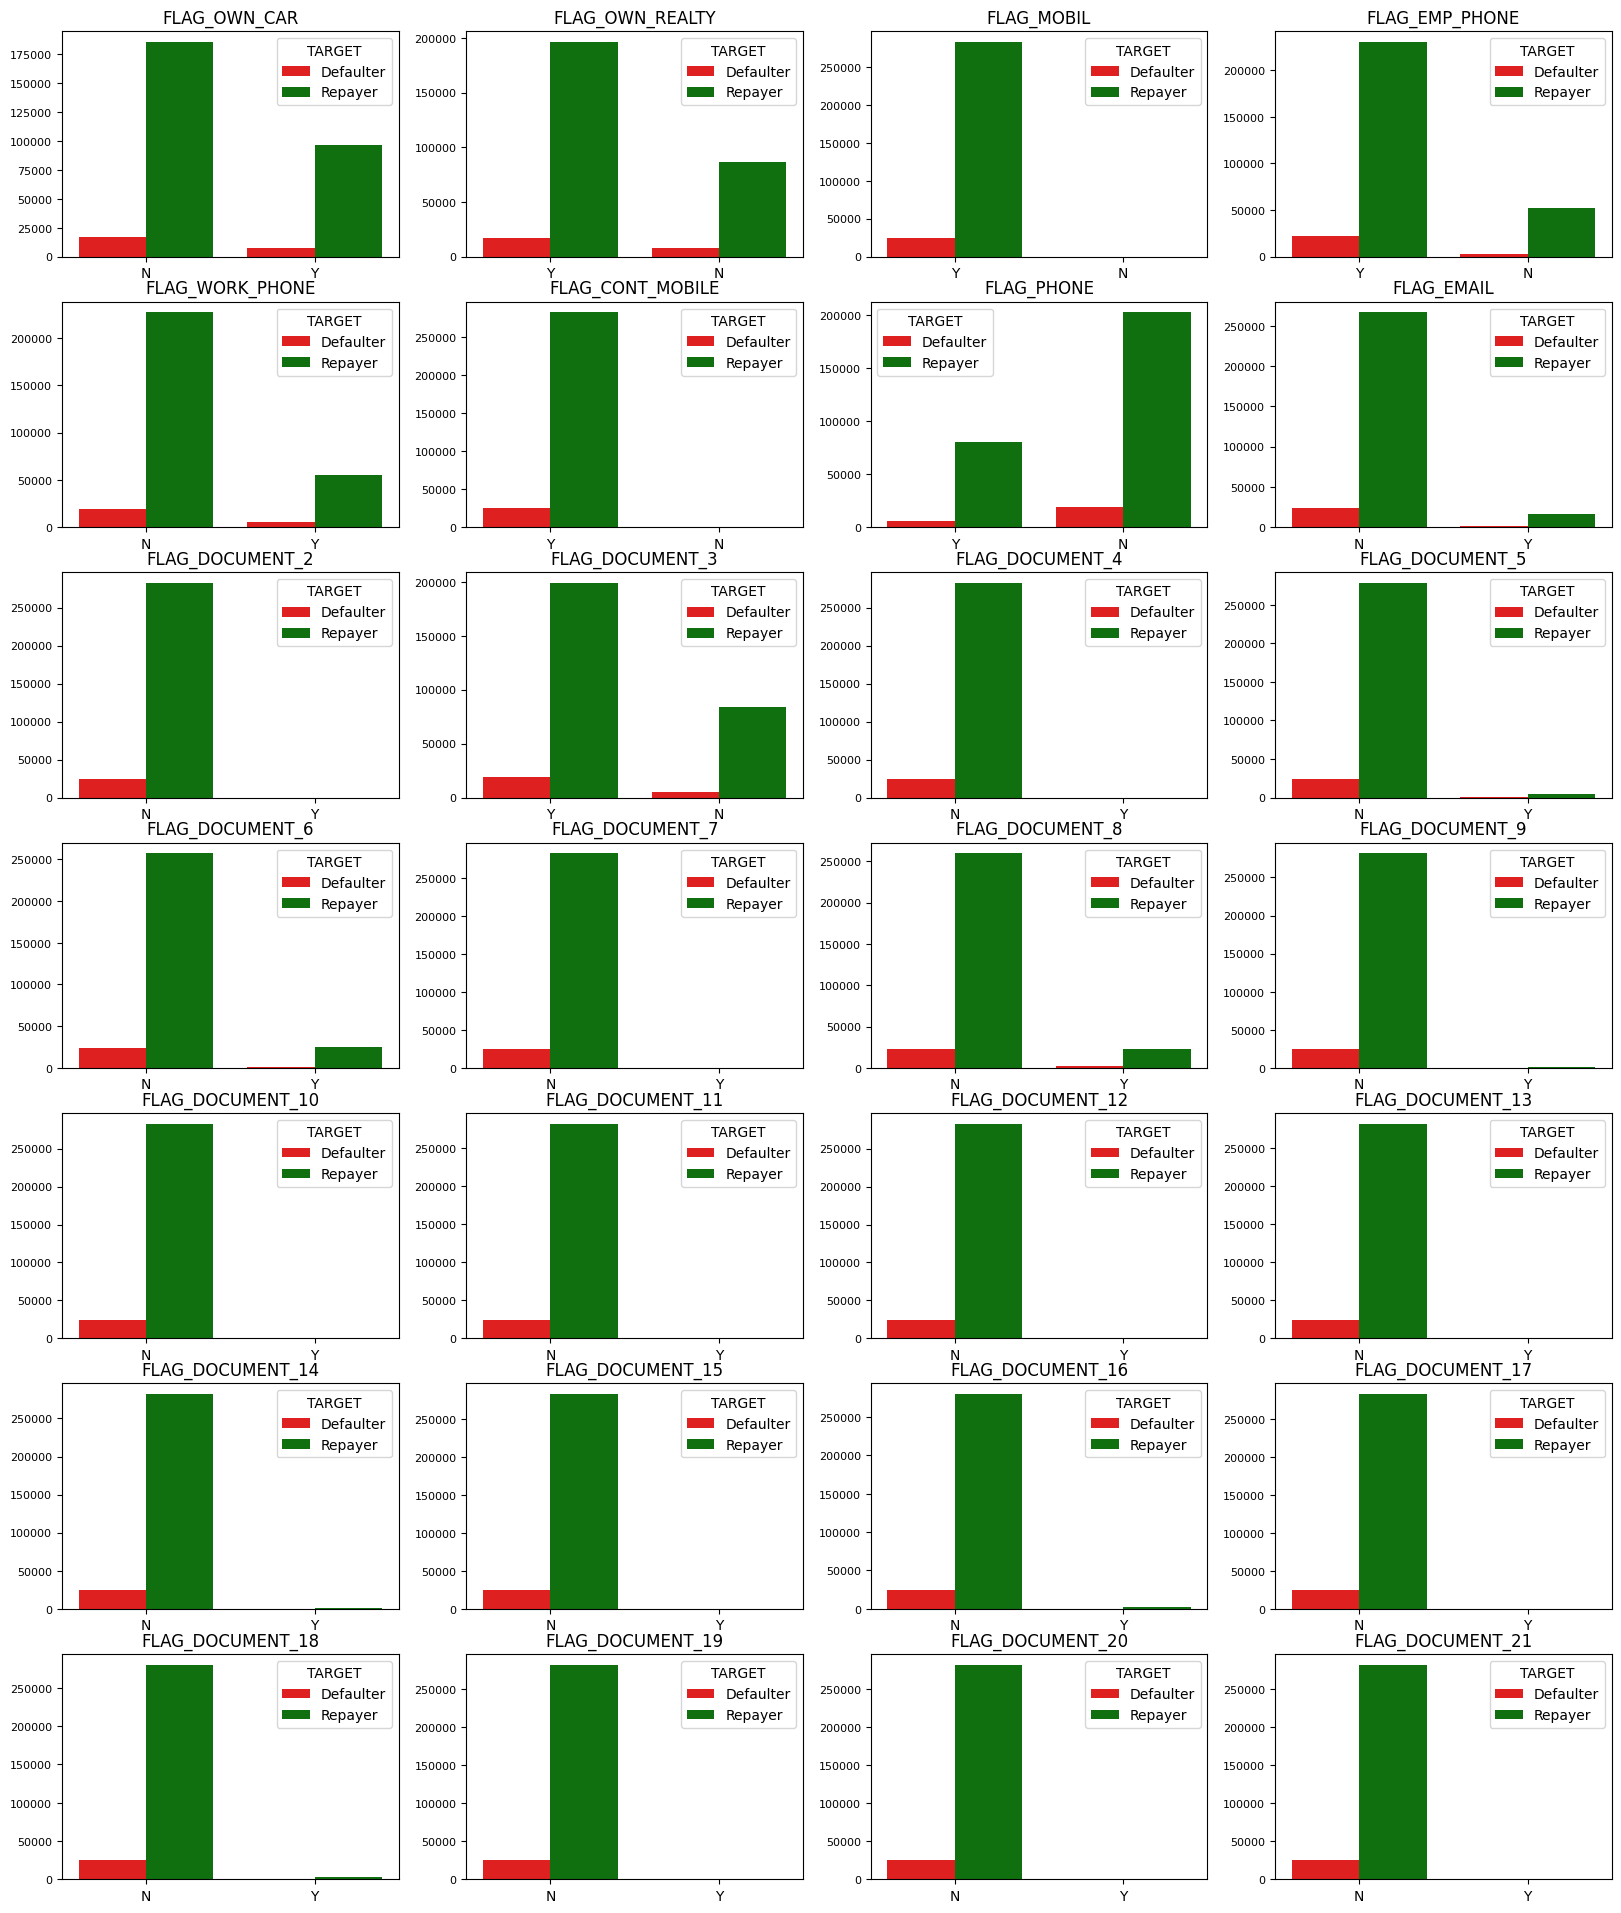

In [ ]:
import itertools 

# Plotting all the graph to find the relation and evaluting for dropping such columns

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag_columns,range(len(flag_columns))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(x=flag_df[i], 
                       hue = flag_df["TARGET"], 
                       palette = ["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**INSIGHT**

* **Following Columns have more repayers than defaulter:**
    - FLAG_OWN_REALTY, 
    - FLAG_MOBIL ,
    - FLAG_EMP_PHONE, 
    - FLAG_CONT_MOBILE, 
    - FLAG_DOCUMENT_3 

**keeping** 
    - FLAG_DOCUMENT_3,
    - FLAG_OWN_REALTY, 
    - FLAG_MOBIL  

**dropping all other FLAG columns.**


In [ ]:
flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
len(flag_df.columns)

25

In [ ]:
# dropping the columns of "flag_df" dataframe 
application_data.drop(flag_df.columns, axis=1, inplace= True)

In [ ]:
application_data.shape   

(307511, 46)

## Imputing values

In [ ]:
null_values(application_data).head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

**Insight**
* **Immputing 7 columns have missing values more than 1%.** 
columns are: 
    - OCCUPATION_TYPE
    - AMT_REQ_CREDIT_BUREAU_YEAR 
    - AMT_REQ_CREDIT_BUREAU_QRT 
    - AMT_REQ_CREDIT_BUREAU_MON 
    - AMT_REQ_CREDIT_BUREAU_WEEK 
    - AMT_REQ_CREDIT_BUREAU_DAY
    - AMT_REQ_CREDIT_BUREAU_HOUR

### Imputing for "OCCUPATION_TYPE" column

In [ ]:
#Percentage of each category present in "OCCUPATION_TYPE"

application_data["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

**Insight:**
* **columnn is categorical.** 
* **impute another category as "Unknown" for the missing values.**

In [ ]:
# imputing null values with "Unknown"

application_data["OCCUPATION_TYPE"] = application_data["OCCUPATION_TYPE"].fillna("Unknown") 

In [ ]:
application_data["OCCUPATION_TYPE"].isnull().sum() 

0

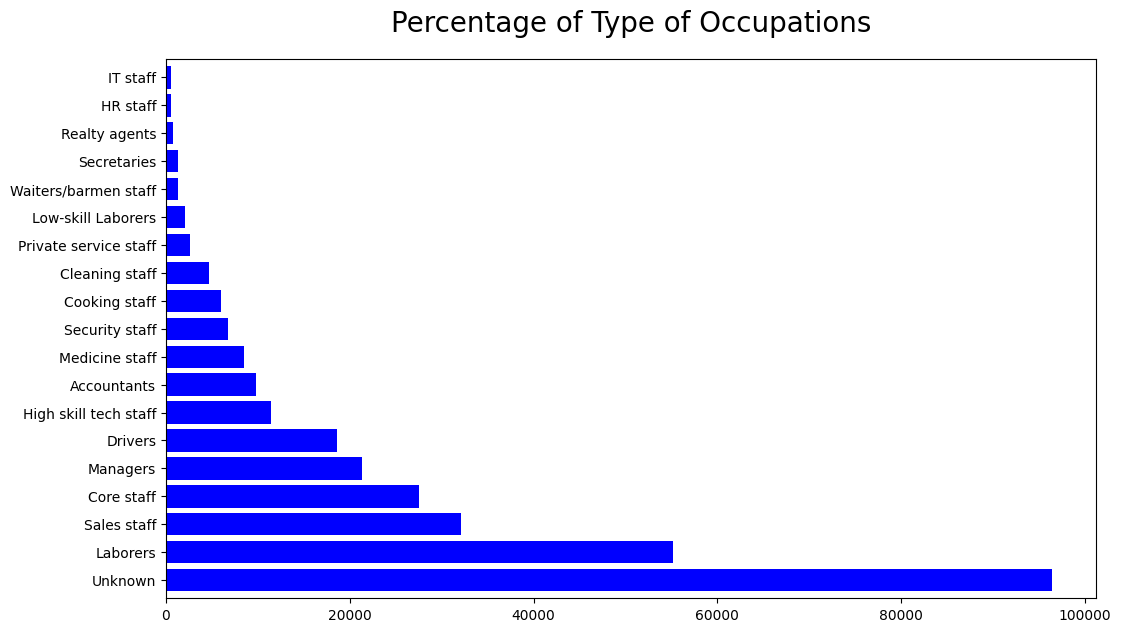

In [ ]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"

plt.figure(figsize = [12,7])
(application_data["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "Blue",
                                                               width = .8)
plt.title("Percentage of Type of Occupations", 
          fontdict={"fontsize":20}, 
          pad =20)
plt.show()

* **Highest percentage of values: Unknown** 
* **Second Highest percentage of values: Laborers**

In [ ]:
application_data[["AMT_REQ_CREDIT_BUREAU_YEAR",
                  "AMT_REQ_CREDIT_BUREAU_QRT",
                  "AMT_REQ_CREDIT_BUREAU_MON",
                  "AMT_REQ_CREDIT_BUREAU_WEEK",
                  "AMT_REQ_CREDIT_BUREAU_DAY",
                  "AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


**These columns discrete in nature, thus imputation will require median value.**

In [ ]:
amount_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR",
                 "AMT_REQ_CREDIT_BUREAU_QRT",
                 "AMT_REQ_CREDIT_BUREAU_MON",
                 "AMT_REQ_CREDIT_BUREAU_WEEK",
                 "AMT_REQ_CREDIT_BUREAU_DAY",
                 "AMT_REQ_CREDIT_BUREAU_HOUR"]

In [ ]:
#filling missing values with median values

application_data.fillna(application_data[amount_credit].median(),inplace = True)

In [ ]:
null_values(application_data).head(10)

NAME_TYPE_SUITE             0.42
DEF_60_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
AMT_GOODS_PRICE             0.09
AMT_ANNUITY                 0.00
CNT_FAM_MEMBERS             0.00
DAYS_LAST_PHONE_CHANGE      0.00
DAYS_EMPLOYED               0.00
dtype: float64

## Standardization

In [ ]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.405292,0.100049,-962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.379803,0.362291,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,-274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,344.000000,24.000000,0.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Insights:**
* **Following columns have very high values**
    - AMT_INCOME_TOTAL
    - AMT_CREDIT
    - AMT_GOODS_PRICE

Thus will make these numerical columns in categorical columns for better understanding.

* **Following columns have negative values:**
    - DAYS_BIRTH, DAYS_EMPLOYED, 
    - DAYS_REGISTRATION, 
    - DAYS_ID_PUBLISH, 
    - DAYS_LAST_PHONE_CHANGE 
Thus will correct them

* **convert DAYS_BIRTH to AGE in years**
* **DAYS_EMPLOYED to YEARS EMPLOYED**

### Binning Numerical Columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE to categorical column 

In [ ]:
# Creating bins for income amount in term of Lakhs
application_data['AMT_INCOME_TOTAL']=application_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],
                                            bins,
                                            labels=slot)

In [ ]:
round((application_data["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [ ]:
# Creating bins for Credit amount in term of Lakhs
application_data['AMT_CREDIT']=application_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],
                                            bins=bins,
                                            labels=slots)

In [ ]:
round((application_data["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        17.82
10L Above    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0-1L          1.95
Name: AMT_CREDIT_RANGE, dtype: float64

In [ ]:
# Creating bins for Price of Goods in term of Lakhs
application_data['AMT_GOODS_PRICE']=application_data['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_data['AMT_GOODS_PRICE_RANGE']=pd.cut(application_data['AMT_GOODS_PRICE'],
                                                 bins=bins,
                                                 labels=slots)

In [ ]:
round((application_data["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        20.43
4L-5L        18.54
6L-7L        13.03
10L Above    11.11
1L-2L        10.73
8L-9L         6.99
3L-4L         6.91
5L-6L         4.27
0-1L          2.83
7L-8L         2.64
9L-10L        2.53
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

**DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE**

In [ ]:
days_column = ["DAYS_BIRTH", 
               "DAYS_EMPLOYED", 
               "DAYS_REGISTRATION", 
               "DAYS_ID_PUBLISH", 
               "DAYS_LAST_PHONE_CHANGE"]


In [ ]:
#using abs() function to correct the days values

application_data[days_column]= abs(application_data[days_column])

In [ ]:
application_data[days_column].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


### Converting DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning years for better understanding, that is adding two more categorical column

In [ ]:
application_data["AGE"] = application_data["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

application_data["AGE_GROUP"] = pd.cut(application_data["AGE"], 
                                       bins=bins, 
                                       labels=slots)

In [ ]:
application_data["AGE_GROUP"].value_counts(normalize= True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [ ]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

application_data["YEARS_EMPLOYED"] = application_data["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

application_data["EMPLOYEMENT_YEARS"] = pd.cut(application_data["YEARS_EMPLOYED"], 
                                               bins=bins, 
                                               labels=slots)

In [ ]:
application_data["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64

## Outliers investigation

In [ ]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,...,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,27108.573909,5.383962,0.020868,16036.995067,67724.742149,...,962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231,4.024908,14493.737315,3.694465,0.013831,4363.988632,139443.751806,...,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133,382.037676
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,12413.000000,933.000000,...,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,15750.000000,2219.000000,...,757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19682.000000,5707.000000,...,1570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288,15.635616
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,...,4292.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


* **from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:**

In [ ]:
outlier_columns = ["CNT_CHILDREN",
                   "AMT_INCOME_TOTAL", 
                   "AMT_CREDIT", 
                   "AMT_ANNUITY", 
                   "AMT_GOODS_PRICE",
                   "DAYS_BIRTH", 
                   "DAYS_EMPLOYED", 
                   "DAYS_REGISTRATION"]

/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/seaborn/_oldcore.py:1592: UserWarning

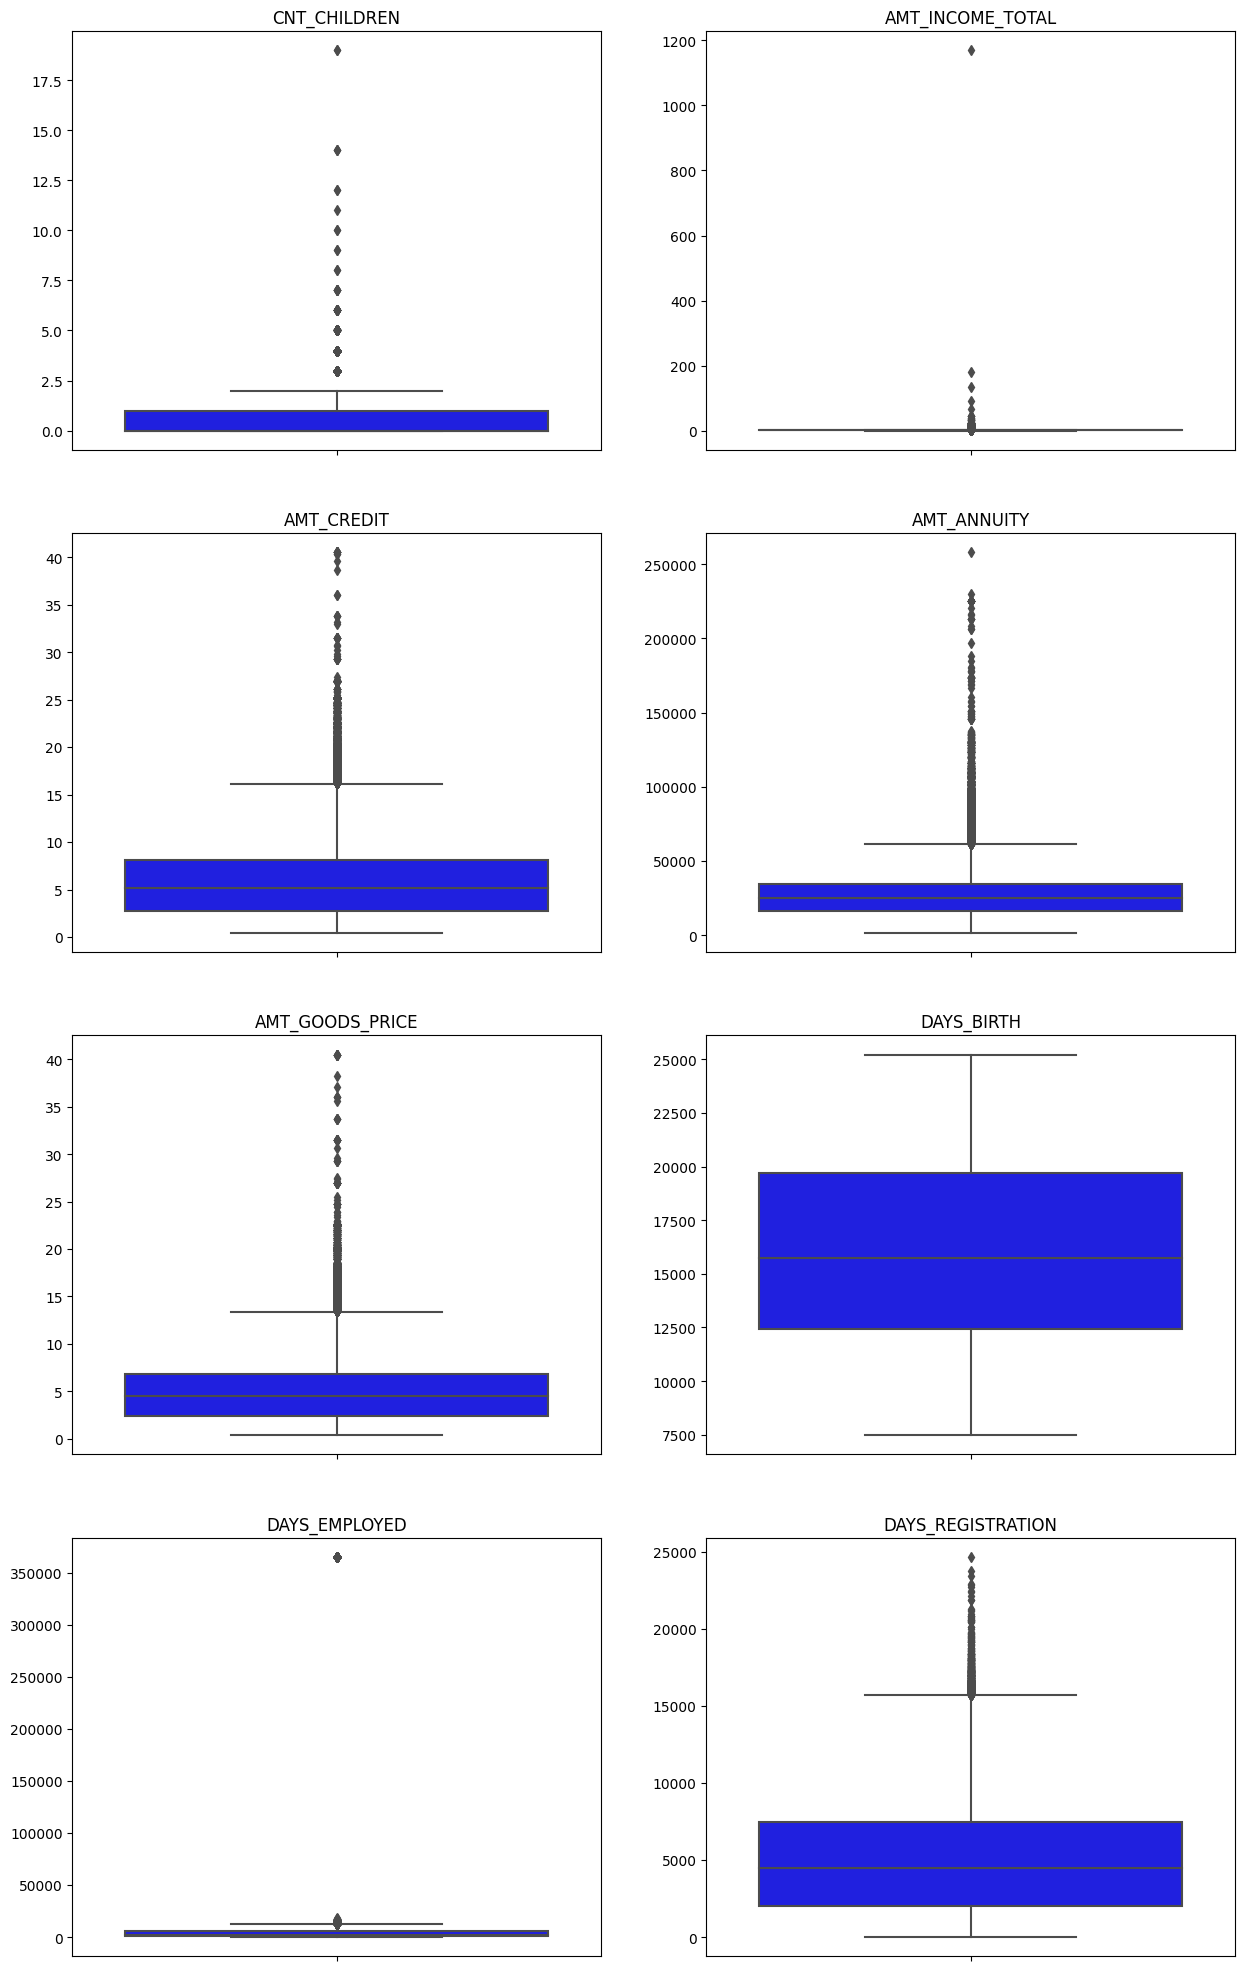

In [ ]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_columns, range(len(outlier_columns))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = application_data[i], 
                orient = "h", 
                color = "blue")
    plt.yticks(fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Insight:**

**It can be seen that in current application data**
   * **AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.**
   * **AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.**
   * **DAYS_BIRTH has no outliers which means the data available is reliable.**
   * **DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.**

In [ ]:
application_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_REALTY                     2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
FLAG_DOCUMENT_3                     2
REG_REGION_NOT_WORK_REGION          2
FLAG_MOBIL                          2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYEMENT_YEARS                   7
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AGE_GROUP                           9
DEF_30_CNT_S

In [ ]:
#Checking the number of unique values each column possess to identify categorical columns

application_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

## 6. Converting Desired columns from Object to categorical column

In [ ]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_R

In [ ]:
#from the list, we have taken out the desired columns for conversion

categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    application_data[col] = pd.Categorical(application_data[col])


In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

**Insight**
* **After imputing we have 53 columns and we will move ahead with Data Analysis on these columns**

In [ ]:
application_data.shape

(307511, 53)

# Saving Transformed application_data 

In [ ]:
# Saving Transformed application_data 
application_data.to_csv('cleaned_application_data.csv',
                        index=False)

In [ ]:
clean_application_data= pd.read_csv("/Users/anurag/Desktop/Appinventiv/cleaned_data/cleaned_application_data.csv")

In [ ]:
clean_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS
0,100002,1,Cash loans,M,Y,0,2.025,4.065975,24700.5,3.510,...,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L,25.920548,25-30,1.745205,0-5
1,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,...,0.0,0.0,0.0,2L-3L,10L Above,10L Above,45.931507,45-50,3.254795,0-5
2,100004,0,Revolving loans,M,Y,0,0.675,1.350000,6750.0,1.350,...,0.0,0.0,0.0,0-1L,1L-2L,1L-2L,52.180822,50-55,0.616438,0-5
3,100006,0,Cash loans,F,Y,0,1.350,3.126825,29686.5,2.970,...,0.0,0.0,1.0,1L-2L,3L-4L,2L-3L,52.068493,50-55,8.326027,5-10
4,100007,0,Cash loans,M,Y,0,1.215,5.130000,21865.5,5.130,...,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L,54.608219,50-55,8.323288,5-10


In [ ]:
clean_application_data.shape

(307511, 53)